<a href="https://colab.research.google.com/github/raquel-checcucci/CE880_Lab_Task/blob/main/Week5/Exercise_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE880: An Approachable Introduction to Data Science
### Prepared by: Haider Raza (h.raza@essex.ac.uk)
### Approximate time: 120 minutes

***
## Learning Outcome

* Classification
***

Let's first clone the our CE880 repository to Google Colab
https://github.com/sagihaider/CE880_2021.git

In [30]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [31]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [32]:
# shape
print(dataset.shape)

(150, 5)


In [33]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [35]:
dataset['class'] = dataset['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

dataset['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [36]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [37]:
# class distribution
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


## Data Visualisation

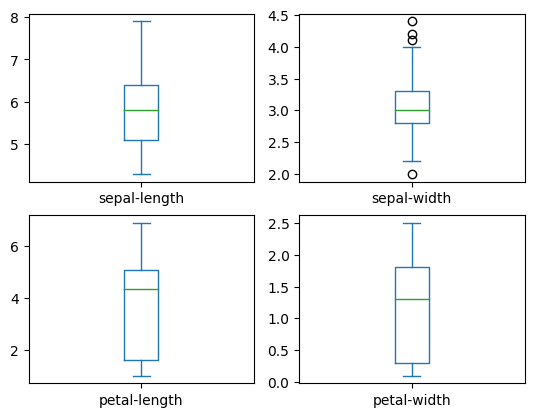

In [52]:
# box and whisker plots
dataset1 = dataset.iloc[:,:4]
dataset1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()


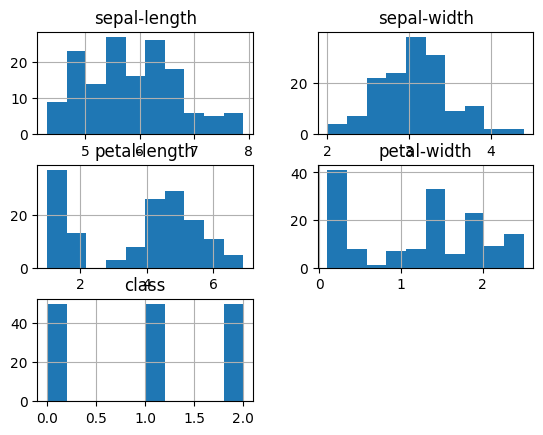

In [39]:
# histograms
dataset.hist()
pyplot.show()


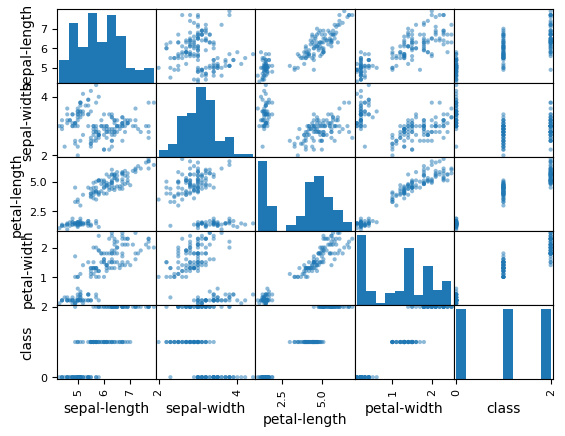

In [40]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

## Create a Validation Dataset

We will split the loaded dataset into two, `80%` of which we will use to train, evaluate and select among our models, and `20%` that we will hold back as a validation dataset.

In [41]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Scaling the data

In [42]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Applying KNN


In [43]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict y data with classifier:
y_predict_knn = classifier.predict(X_test)

# Print results:
print(confusion_matrix(y_test, y_predict_knn))
print(classification_report(y_test, y_predict_knn))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Support Vector Classifer

In [44]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

# Predict y data with classifier:
y_predict_svc = svm.predict(X_test)
# Print results:
print(confusion_matrix(y_test, y_predict_svc))
print(classification_report(y_test, y_predict_svc))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## XGBoost


In [45]:
import xgboost as xgb

dataset['class'] = dataset['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

array = dataset.values

y = array[:,4]

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

# Predict y data with classifier:
y_predict_xgb = xgb_clf.predict(X_test)
# Print results:
print(confusion_matrix(y_test, y_predict_xgb))
print(classification_report(y_test, y_predict_xgb))

[[11  0  0]
 [ 1 11  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



## Decision Tree

In [48]:
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

# Predict y data with classifier:
y_predict_dt = decision_tree.predict(X_test)
# Print results:
print(confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Random Forest


In [49]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

# Predict y data with classifier:
y_predict_rf = random_forest.predict(X_test)
# Print results:
print(confusion_matrix(y_test, y_predict_rf))
print(classification_report(y_test, y_predict_rf))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

